<h2> MADS: Milestone II (Team 10) - EDA Jupyter Notebook</h2>
<h3> Topic: Machine learning on duty: solving consumer complaints and improving satisfaction!</h3>
<h4> Authors: Chih-Han Yeh (yehch), Yi-Hsin Chien (yihsinc), Weiming Chen ( weimingc) </h4>
<h4> Mentor: Alexis Castellanos</h4>

<h3>Project Overview</h3></br>
In response to the escalating volume of consumer complaints and the complexities involved in addressing them promptly, our dedicated team is committed to leveraging data-driven strategies to enhance our comprehension of these complaints. Our overarching objective is to develop efficient techniques for managing and resolving complaints by predicting which ones are likely to be disputed by consumers and unveiling concealed patterns or clusters within the narrative of these complaints.

<h3>Environment Setting</h3></br>
Importing libraries we need for our project.

In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from textblob import TextBlob

# disable altair limit
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
# load complaints data
data = pd.read_csv('complaints.csv')
#display first 5 rows
data.head()

C:\Users\chien\AppData\Local\Temp\ipykernel_21524\1871133070.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('complaints.csv')


Date received                                            Product  \
0    2023-08-24  Credit reporting, credit repair services, or o...   
1    2023-08-25  Credit reporting or other personal consumer re...   
2    2023-07-13                        Checking or savings account   
3    2023-08-25  Credit reporting or other personal consumer re...   
4    2023-09-13  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting  Problem with a credit reporting company's inve...   
1  Credit reporting                        Improper use of your report   
2  Checking account             Problem caused by your funds being low   
3  Credit reporting                        Improper use of your report   
4  Credit reporting  Problem with a company's investigation into an...   

                                           Sub-issue  \
0  Was not notified of investigation status or re...   
1      Reporting company used your report improperly   
2                      Overdrafts and overdraft fees   
3      Reporting company used your report improperly   
4  Their investigation did not fix an error on yo...   

                        Consumer complaint narrative  \
0                                                NaN   
1                                                NaN   
2  Citibank allowed debit card transactions to ov...   
3                                                NaN   
4                                                NaN   

                             Company public response  \
0                                                NaN   
1                                                NaN   
2  Company has responded to the consumer and the ...   
3                                                NaN   
4                                                NaN   

                               Company State ZIP code           Tags  \
0  Experian Information Solutions Inc.    NJ    07024            NaN   
1         SANTANDER HOLDINGS USA, INC.    FL    33972            NaN   
2                       CITIBANK, N.A.    TX    XXXXX            NaN   
3                        EQUIFAX, INC.    FL    33884  Servicemember   
4         SANTANDER HOLDINGS USA, INC.    TX    77521            NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                      Other           Web           2023-08-24   
1                        NaN           Web           2023-08-25   
2           Consent provided           Web           2023-07-13   
3                        NaN           Web           2023-08-25   
4                        NaN           Web           2023-09-13   

      Company response to consumer Timely response? Consumer disputed?  \
0                      In progress              Yes                NaN   
1          Closed with explanation              Yes                NaN   
2          Closed with explanation              Yes                NaN   
3  Closed with non-monetary relief              Yes                NaN   
4          Closed with explanation              Yes                NaN   

   Complaint ID  
0       7452639  
1       7512160  
2       7244354  
3       7453721  
4       7542838

<h3>Exploratory Data Analysis</h3></br>
To understand our dataset, our team performs EDA on our data.

In [3]:
#show the shape of the dataframe
print(data.shape)
#check the datatype
data.info()

(4091495, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091495 entries, 0 to 4091494
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

 - The number of unique values in each column

In [4]:
# check unique values in each column, and print it out as dictionary
n_unique = data.nunique().to_dict()
n_unique

{'Date received': 4311,
 'Product': 21,
 'Sub-product': 85,
 'Issue': 176,
 'Sub-issue': 267,
 'Consumer complaint narrative': 1254191,
 'Company public response': 11,
 'Company': 6953,
 'State': 63,
 'ZIP code': 33091,
 'Tags': 3,
 'Consumer consent provided?': 4,
 'Submitted via': 7,
 'Date sent to company': 4260,
 'Company response to consumer': 8,
 'Timely response?': 2,
 'Consumer disputed?': 2,
 'Complaint ID': 4091495}

- Date received: data time range

In [5]:
# astype date received and date sent to company to datetime
data['Date received'] = pd.to_datetime(data['Date received'])
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])
print("Data time range: ", data['Date received'].min().date(), data['Date received'].max().date())

Data time range:  2011-12-01 2023-09-21


 - Data volume by year

In [6]:
# Perform the value counts and sorting
value_counts = data['Date received'].dt.year.value_counts().sort_index().reset_index()
value_counts.columns = ['Year', 'Count']

# Create the Altair chart
yearly_counts = alt.Chart(value_counts).mark_bar().encode(
    x='Year:O',
    y='Count:Q'
).properties(
    title='Yearly Counts of Data received'
)

yearly_counts

alt.Chart(...)

- Observation</br>
</br>
When visualizing the data volume by year, it's evident that the bulk of the data is concentrated in the recent four years, with the preceding nine years showing sparse entries. This distribution can lead to challenges such as biased estimations that predominantly reflect the current period, complications in time series analysis due to uneven data spread, a lack of insight into long-term trends, an overemphasis on recent fluctuations, issues with insufficient sample size from the earlier years, potential biases if collection methods varied over time, and the risk of overlooking significant events or changes from the sparsely represented years. Such uneven data distribution necessitates careful consideration to ensure comprehensive and accurate analysis.

In [7]:
# Perform the value counts and sorting
monthly_counts = data['Date received'].dt.month.value_counts().sort_index().reset_index()
monthly_counts.columns = ['Month', 'Count']

# Create the Altair chart
monthly_count = alt.Chart(monthly_counts).mark_bar().encode(
    x='Month:O',
    y='Count:Q'
).properties(
    title='Monthly Counts of Date received'
)

monthly_count

alt.Chart(...)

<h4>Missing values percentage</h4></br>
Checking the percentage of missing values in a dataset is pivotal to assessing its quality and reliability. This metric guides decisions on whether to impute, drop, or retain data, especially since many algorithms necessitate datasets devoid of missing values. Moreover, unaddressed missing values can introduce bias, skewing results, and potentially misguiding subsequent analyses. Thus, recognizing and addressing data gaps ensures robust and unbiased data-driven outcomes.

In [8]:
# check for missing values percentage
data.isnull().sum()/len(data)

Date received                   0.000000
Product                         0.000000
Sub-product                     0.057507
Issue                           0.000000
Sub-issue                       0.175175
Consumer complaint narrative    0.637648
Company public response         0.536736
Company                         0.000000
State                           0.010567
ZIP code                        0.007384
Tags                            0.895678
Consumer consent provided?      0.220374
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000001
Timely response?                0.000000
Consumer disputed?              0.812206
Complaint ID                    0.000000
dtype: float64

**Missing values percentage by year**

In [9]:
# add a column for year, 
# missing values percentage by column and by year
data['year'] = pd.DatetimeIndex(data['Date received']).year

# transpose the table to get a better view, store it in a new dataframe
data_year = data.groupby('year').apply(lambda x: x.isnull().sum()/len(x)).T

#display results
data_year

year                              2011      2012      2013      2014  \
Date received                 0.000000  0.000000  0.000000  0.000000   
Product                       0.000000  0.000000  0.000000  0.000000   
Sub-product                   0.496845  0.238020  0.255778  0.293559   
Issue                         0.000000  0.000000  0.000000  0.000000   
Sub-issue                     1.000000  0.973982  0.763674  0.525397   
Consumer complaint narrative  1.000000  1.000000  1.000000  1.000000   
Company public response       1.000000  0.999972  0.999917  0.999131   
Company                       0.000000  0.000000  0.000000  0.000000   
State                         0.005915  0.008498  0.009731  0.006542   
ZIP code                      0.005126  0.006853  0.007670  0.003993   
Tags                          0.849763  0.897999  0.870138  0.851744   
Consumer consent provided?    1.000000  1.000000  1.000000  1.000000   
Submitted via                 0.000000  0.000000  0.000000  0.000000   
Date sent to company          0.000000  0.000000  0.000000  0.000000   
Company response to consumer  0.000000  0.000000  0.000000  0.000000   
Timely response?              0.000000  0.000000  0.000000  0.000000   
Consumer disputed?            0.000000  0.000000  0.000000  0.000000   
Complaint ID                  0.000000  0.000000  0.000000  0.000000   
year                          0.000000  0.000000  0.000000  0.000000   

year                              2015      2016      2017      2018  \
Date received                 0.000000  0.000000  0.000000  0.000000   
Product                       0.000000  0.000000  0.000000  0.000000   
Sub-product                   0.315560  0.348470  0.099731  0.000058   
Issue                         0.000000  0.000000  0.000000  0.000000   
Sub-issue                     0.534102  0.516204  0.239707  0.138887   
Consumer complaint narrative  0.675007  0.593541  0.525980  0.539551   
Company public response       0.633726  0.479627  0.519182  0.495718   
Company                       0.000000  0.000000  0.000000  0.000000   
State                         0.006791  0.006932  0.016351  0.029107   
ZIP code                      0.004464  0.004430  0.013049  0.025550   
Tags                          0.845547  0.851589  0.864347  0.870494   
Consumer consent provided?    0.408434  0.265366  0.185430  0.188129   
Submitted via                 0.000000  0.000000  0.000000  0.000000   
Date sent to company          0.000000  0.000000  0.000000  0.000000   
Company response to consumer  0.000000  0.000000  0.000000  0.000004   
Timely response?              0.000000  0.000000  0.000000  0.000000   
Consumer disputed?            0.000000  0.000000  0.702153  1.000000   
Complaint ID                  0.000000  0.000000  0.000000  0.000000   
year                          0.000000  0.000000  0.000000  0.000000   

year                              2019      2020      2021      2022      2023  
Date received                 0.000000  0.000000  0.000000  0.000000  0.000000  
Product                       0.000000  0.000000  0.000000  0.000000  0.000000  
Sub-product                   0.000047  0.000034  0.000103  0.000034  0.000000  
Issue                         0.000000  0.000000  0.000000  0.000000  0.000000  
Sub-issue                     0.124984  0.088916  0.093214  0.056405  0.036920  
Consumer complaint narrative  0.549708  0.607596  0.589528  0.578687  0.684949  
Company public response       0.480696  0.431368  0.598439  0.426374  0.507004  
Company                       0.000000  0.000000  0.000000  0.000000  0.000000  
State                         0.028471  0.018199  0.011631  0.002481  0.003288  
ZIP code                      0.025168  0.016153  0.005028  0.000217  0.000112  
Tags                          0.863812  0.900048  0.909367  0.913654  0.925455  
Consumer consent provided?    0.160916  0.110496  0.078007  0.056119  0.199651  
Submitted via                 0.000000  0.000000  0.000000  0.000

- Visualizing the result

In [10]:
#set up the plot dataframe
heat_map_df = data_year.round(2).reset_index()

#melt the wide form to long form for plotting
data_melted = heat_map_df.melt(id_vars=['index'], 
                        value_vars=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], 
                        var_name='column', value_name='value')
#rename for clarity
data_melted.rename(columns={
    'index': 'column',
    'column': 'year',
    'value': 'percentage'
}, inplace=True)

#using Altair to plot the heatmap
chart = alt.Chart(data_melted).mark_rect().encode(
    x= alt.X('year:O', title= "Year"),
    y= alt.Y('column:O', title = "Column Names"),
    color= alt.Color('percentage:Q', scale = alt.Scale(scheme='yelloworangered'), legend=alt.Legend(title="Percentage of Missing Value")),
    tooltip=['column', 'year', 'percentage']
).properties(
    title = alt.TitleParams(
        text = "Heatmap: Percentage of Missing Value of each column by year",
        anchor = 'middle',
        offset = 30  
    )
).configure(background='#f5faf6')

chart.display()

alt.Chart(...)

- Observation</br>
</br>
From the above heatmap, we identify that the "Company public response," "Consumer complaint narrative," "Consumer consent provided?" and "Sub-issue" columns all suffered from 100% missing values at the beginning of collecting data and then gradually improving the missing level. Moreover,  the column "Consumer disputed?" was without missing value before 2016 but became 100% missing after 2018. Lastly, the column "Tags" seems to consist of missing values, indicating that this column should not be used in our project as one feature.

<h4>Checking the distribution of missing and non-missing data based on the year.</h4></br>

In [11]:
# number of non-missing and missing 'consumer disputed?' by year
count_null_n_notnull = data.groupby('year')['Consumer disputed?'].agg(
    notnull_count = lambda x: x.notnull().sum(),
    null_count = lambda x: x.isnull().sum()
).reset_index()
# melted dataframe for plotting stacked bar chart
count_null_n_notnull_melted = count_null_n_notnull.melt(id_vars=['year'], 
                        value_vars=['notnull_count', 'null_count'], 
                        var_name='type', value_name='count')

# Altair for stacked bar chart
chart_count_null_n_notnull = alt.Chart(count_null_n_notnull_melted).mark_bar().encode(
    x='year:N',             
    y='count:Q',
    color = 'type:N'
).properties(
    title='Missing and Non-missing Counts by Year'
).configure(background='#f5faf6')

chart_count_null_n_notnull.display()

alt.Chart(...)

- Observation</br>
</br>
The visualization shows that data has minimal missing values in the front end but is predominantly missing in the back end. When we conduct machine learning with this data, the model might cause a bias towards the front-end data with non-missing values, leading to potential model biases and inaccurate predictions. The vast amount of missing data might render methods of filling missing values inapplicable or ineffective. Especially for time-series data, missing values in the back-end can distort interpretations. Therefore, it's crucial to choose tools, understand the reasons behind the missing values before any imputation, and constantly validate analysis results to ensure missing data doesn't lead to misleading conclusions.

<h4>Checking whether features are balanced or imbalanced.</h4></br>

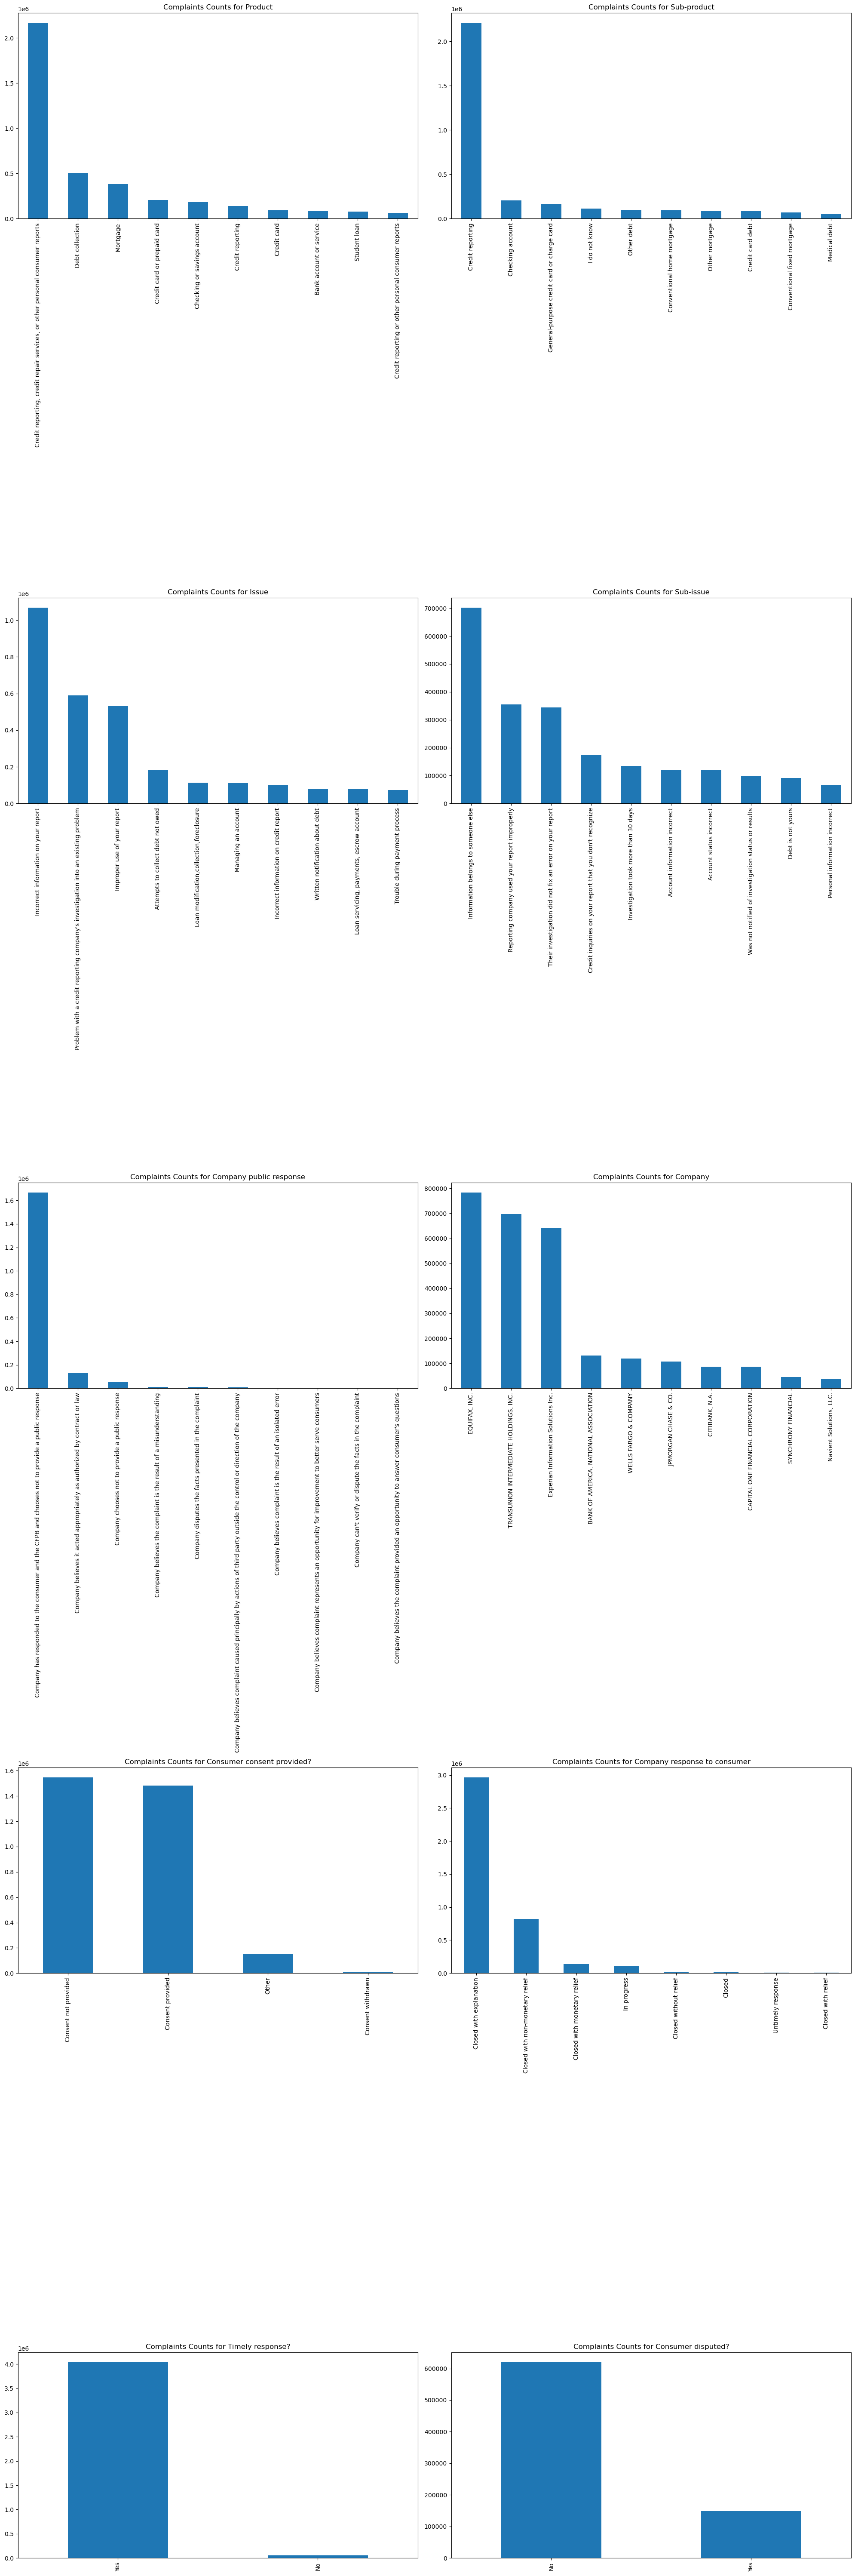

In [12]:
#Visualize the top 10 ranked elements for each feature simultaneously to assess their balance.
Col_interested = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company public response', 'Company','Consumer consent provided?',
  'Company response to consumer','Timely response?', 'Consumer disputed?']

fig, axes = plt.subplots(5,2, figsize=(20, 60))
axes = axes.flatten()

for i, item in enumerate(Col_interested):
    data[item].value_counts().head(10).plot(kind='bar', ax=axes[i], title=f'Complaints Counts for {item}')
       
plt.tight_layout()
plt.show()

- Observation</br>
</br>
Since multiple features in this dataset display a strong imbalance towards a few elements, applying supervised or unsupervised learning techniques can introduce several challenges. In supervised learning, such as classification tasks, a model might become biased towards predicting the dominant class, leading to poor generalization on unseen data with different class distributions. Regression models, similarly, may skew towards values tied to dominant features, producing inaccurate predictions for underrepresented values. Moreover, the perceived importance of features can be distorted, causing models, especially complex ones, to overfit the majority class or dominant features. This overfitting means the model captures the nuances of most data but needs to generalize better to new data.
</br>
</br>
Unsupervised learning, such as clustering, faces its own set of challenges with imbalanced data. The majority group could get divided into multiple clusters, while the minority group might be lumped into one or overlooked. Algorithms could become biased towards specific cluster shapes or densities, further misrepresenting the data's structure. Furthermore, unsupervised anomaly detection might treat the minority class as noise, potentially overlooking significant rare events or anomalies. Traditional model validation techniques might prove ineffective, with simple train-test splits sometimes neglecting to represent the minority class in test data sufficiently. Addressing these issues will require us to figure out strategies like resampling, synthetic data generation, or tailored performance metrics or segment the portion of this dataset where we can balancely conduct machine learning techniques.

<h3>Visualizations on details for identifying interesting theme for supervised and unsupervised tasks</h3></br>
<h4>Monthly Trends of Complaints Received by Products</h4></br>

In [13]:
# Group by month and product
monthly_product_grouped = data.groupby([data['Date received'].dt.to_period('M'), 'Product']).size().reset_index(name='Count')

# Pivot the table
pivot_monthly_product = monthly_product_grouped.pivot(index='Date received', columns='Product', values='Count').fillna(0)

# Convert Period back to datetime for plotting
pivot_monthly_product.index = pivot_monthly_product.index.to_timestamp()

# Reshape the data for Altair
pivot_monthly_product.reset_index(inplace=True)
melted_data = pd.melt(pivot_monthly_product, id_vars=['Date received'], var_name='Product', value_name='Count')

# Create the Altair chart
chart = alt.Chart(melted_data).mark_line().encode(
    x=alt.X('Date received:T', title='Month'),
    y=alt.Y('Count:Q', title='Number of Complaints'),
    color=alt.Color('Product:N', title='Product'),
    tooltip=['Date received:T', 'Product:N', 'Count:Q']
).properties(
    title='Monthly Trends of Complaints Received by Product',
    width=700,
    height=400
)

chart

alt.Chart(...)

<h4>Monthly Trends of Complaints Received by a specific product (interactive)</h4></br>

In [14]:
# Create a dropdown selection for products
product_selection = alt.selection_single(
    name='Select',
    fields=['Product'],
    bind=alt.binding_select(options=data['Product'].unique()),

)

# Group by month and count the complaints for all products
monthly_product_grouped = data.groupby([pd.Grouper(key='Date received', freq='M'), 'Product']).size().reset_index(name='Count')

# Create the Altair chart
monthly_trends = alt.Chart(monthly_product_grouped).mark_line().encode(
    x=alt.X('Date received:T', title='Month'),
    y=alt.Y('Count:Q', title='Number of Complaints'),
    tooltip=['Date received:T', 'Count:Q'],
    color='Product:N'
).transform_filter(product_selection).properties(
    title=alt.TitleParams(text='Monthly Trends of Complaints Received', subtitle='by Product'),
    width=700,
    height=400
).add_selection(product_selection)

monthly_trends


C:\Users\chien\anaconda3\lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\chien\anaconda3\lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

- Observation</br>
</br>
Based on the line chart displaying monthly complaint trends for each product, it's evident that the majority of products receive fewer than 10,000 complaints. However, the product "Credit reporting, credit repair services, or other personal consumer reports" stands out with a significant upward trend, rising from under 10,000 to over 80,000 complaints. This particular product warrants a deeper investigation.

<h4>Company Responses by Product and Issue</h4></br>

In [15]:
# Pivot table to get counts of each company response by product and issue
response_counts = pd.pivot_table(data, values='Complaint ID',
                                 index='Product', columns='Company public response',
                                 aggfunc='count', fill_value=0)

# Convert the pivot table to a DataFrame
response_counts = response_counts.reset_index()

# Melt the DataFrame for Altair
melted_response_counts = pd.melt(response_counts, id_vars='Product',
                                 var_name='Company public response',
                                 value_name='Count')

# Plot cluster chart
chart = alt.Chart(melted_response_counts).mark_bar().encode(
    x=alt.X('Product:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Count:Q', stack='zero'),
    color=alt.Color('Company public response:N'),
    tooltip=['Product:N', 'Company public response:N', 'Count:Q']
).properties(
    title='Company Responses by Product and Issue'
)

chart.interactive()

# Pivot table for top 3 negative responses
negative_responses = ['Company disputes the facts presented in the complaint',
                      'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
                      'Company chooses not to provide a public response']

negative_response_counts = pd.pivot_table(data[data['Company public response'].isin(negative_responses)],
                                          values='Complaint ID',
                                          index='Product', columns='Company public response',
                                          aggfunc='count',
                                          fill_value=0)

# Convert the pivot table to a DataFrame
negative_response_counts = negative_response_counts.reset_index()

# Melt the DataFrame for Altair
melted_negative_response_counts = pd.melt(negative_response_counts, id_vars='Product',
                                          var_name='Company public response',
                                          value_name='Count')

# Plot cluster chart for negative responses
chart_negative = alt.Chart(melted_negative_response_counts).mark_bar().encode(
    x=alt.X('Product:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Count:Q', stack='zero'),
    color=alt.Color('Company public response:N'),
    tooltip=['Product:N', 'Company public response:N', 'Count:Q']
).properties(
    title='Negative Company Responses by Product and Issue'
)

chart_negative.interactive()

# Show the charts side by side
chart | chart_negative


alt.HConcatChart(...)

- Observation</br>
</br>
The above two charts indicate that most complaints originate from the product category "credit reporting, credit repair service, or other personal consumer report," totaling approximately 1.21 million. Of these, a mere 1.29 thousand pertain to negative feedback, constituting only 0.2% of the complaints. About half of these negative remarks stem from companies attributing the complaints to third-party actions, while the other half arise from companies disputing the complaint's factual accuracy. Notably, while credit reporting complaints stand at 53 thousand, their negative reactions comprise a significant 35.2%. This stark contrast in percentage is noteworthy and merits further investigation.

<h4>Distribution of Sub-Issues within Main Issues, Distribution of Sub-Products within Main Products</h4></br>

In [17]:
alt.data_transformers.disable_max_rows()


# Group data by 'Product' and 'Sub-product' and count complaints
sub_product_counts = data.groupby(['Product', 'Sub-product']).size().unstack(fill_value=0).reset_index()

# Melt the DataFrame for Altair
melted_sub_product_counts = sub_product_counts.melt(id_vars='Product', var_name='Sub-product', value_name='Number of Complaints')

# Create an Altair stacked bar chart for sub-products within main products
bar_chart_sub_products = alt.Chart(melted_sub_product_counts).mark_bar().encode(
    x=alt.X('Product:N', title='Product'),
    y=alt.Y('sum(Number of Complaints):Q', title='Number of Complaints'),
    color=alt.Color('Sub-product:N', title='Sub-product'),
    tooltip=['Product:N', 'Sub-product:N', 'sum(Number of Complaints):Q']
).properties(
    title='Distribution of Sub-Products within Main Products',
    width=400,
    height=300
)

# Group data by 'Issue' and 'Sub-issue' and count complaints
sub_issue_counts = data.groupby(['Issue', 'Sub-issue']).size().unstack(fill_value=0).reset_index()

# Melt the DataFrame for Altair
melted_sub_issue_counts = sub_issue_counts.melt(id_vars='Issue', var_name='Sub-issue', value_name='Number of Complaints')

# Create an Altair stacked bar chart for sub-issues within main issues
bar_chart_sub_issues = alt.Chart(melted_sub_issue_counts).mark_bar().encode(
    x=alt.X('Issue:N', title='Issue'),
    y=alt.Y('sum(Number of Complaints):Q', title='Number of Complaints'),
    color=alt.Color('Sub-issue:N', title='Sub-issue'),
    tooltip=['Issue:N', 'Sub-issue:N', 'sum(Number of Complaints):Q']
).properties(
    title='Distribution of Sub-Issues within Main Issues',
    width=600,
    height=300
)

# Concatenate the two Altair plots horizontally
concatenated_chart = (bar_chart_sub_products | bar_chart_sub_issues)

concatenated_chart.interactive()


alt.HConcatChart(...)

- Observation</br>
</br>
From the presented charts, it's evident that the predominant product is "credit reporting, credit repair services, or other personal consumer reports," which largely encompasses credit reporting. Additionally, there are three primary issue and sub-issue pairings: "incorrect information on your report" coupled with "information belongs to someone else"; "improper use of your report" associated with "reporting company used your report improperly"; and "problem with a credit reporting company's investigation into an existing problem" linked to "their investigation did not fix an error on your report."

<h4>Word Cloud of Consumer Complaint Narratives</h4></br>

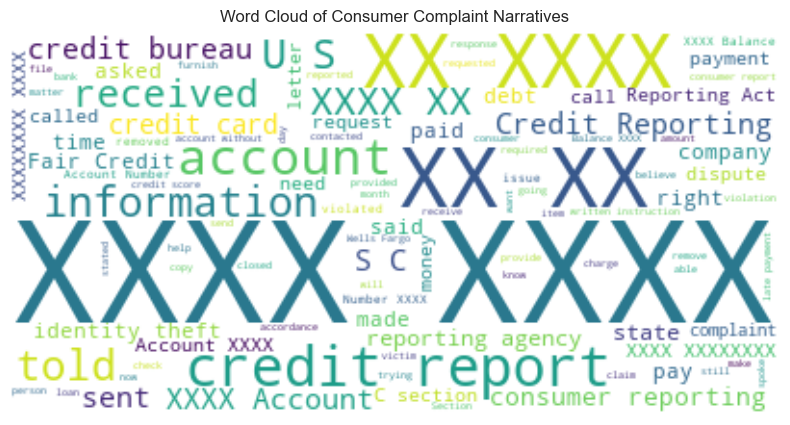

In [19]:
consumer_complaints = data['Consumer complaint narrative'].dropna()  # Remove rows with missing narratives
text = ' '.join(consumer_complaints)  # Combine all narratives into a single text

# Create and generate a word cloud image
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()


- Observation</br>
</br>
From the word cloud depicting consumer complaint narratives, it's clear that credit reporting or credit reports are central themes. Thus, our subsequent machine learning tasks will prioritize issues related to credit reporting.

<h3>Summary for EDA</h3></br>
Given rising consumer complaints and complexities, we are harnessing data-driven strategies to understand these concerns better. We aim to efficiently manage and resolve complaints by predicting potential disputes and uncovering patterns within narratives.

Exploratory data analysis revealed a concentration in the recent four years, with earlier years sparsely populated. This imbalance poses analytical challenges, from bias towards recent trends to potential overlooking of key historical events.
To gauge data quality and reliability, we assess missing values. Important columns like "Company public response," "Consumer complaint narrative," and others initially had 100% missing values, though they have improved over time. The column "Tags" is persistently incomplete, deeming it unsuitable for our project. Addressing missing values is crucial; otherwise, it could lead to model bias or misinterpretations, especially in time-series data.

Another challenge is data imbalance. In supervised learning, the model may become biased towards the dominant class, affecting its accuracy and generalizability. In unsupervised learning, the minority group might be ignored or misrepresented. Tackling this requires strategies like resampling or focusing on balanced data portions.

The line chart of monthly complaints underscores the prominence of "Credit reporting, credit repair services, or other personal consumer reports" as a significant concern. This product's complaints skyrocketed from under 10,000 to over 80,000, necessitating deeper exploration. Most complaints stem from this category, totaling around 1.21 million, but only 0.2% are negative. Half of these negatives are due to companies blaming third parties or disputing facts. Despite representing only 53 thousand complaints, negative reactions to credit reporting constitute 35.2% of them.

Consequently, the central focus of our machine learning endeavors will be on issues concerning credit reporting, as it is a dominant theme across all our visualizations and analyses.

<h3>Strategies for Effective Supervised and Unsupervised Learning</h3></br>
<h4>Supervised Learning:</h4></br>
For supervised learning, addressing the dataset's imbalance is paramount. Techniques like oversampling using SMOTE (Synthetic Minority Over-sampling Technique), undersampling, or hybrid methods can help balance classes. Feature selection and engineering can be refined based on exploratory data analysis, using methods like Recursive Feature Elimination (RFE) or models like Random Forest for feature importance. Start the modeling process with simpler models, like logistic regression, to establish a baseline, and then transition to more complex models such as Gradient Boosting Machines or Neural Networks. Given the data's imbalance, traditional accuracy might not be ideal; consider using F1-Score, ROC-AUC, or Precision-Recall curves. Lastly, employ tools like GridSearchCV or RandomizedSearchCV for hyperparameter tuning. Cross-validation, particularly K-Fold, will ensure the model's robustness, and creating a consistent preprocessing pipeline for training and validation/test data will enhance reproducibility.
<h4>Unsupervised Learning:</h4></br>
For unsupervised learning, dimensionality reduction techniques like PCA (Principal Component Analysis) or t-SNE can be vital, especially before clustering, to provide better visualization and data structure insights. Clustering algorithms such as K-Means, Hierarchical clustering, or DBSCAN can be applied; remember to standardize or normalize data beforehand. Silhouette Analysis can determine the ideal number of clusters. Anomaly detection can be critical, especially if minority classes or rare events hold significance; consider techniques like Isolation Forest or One-Class SVM. If your dataset contains categorical variables, association rules mining using algorithms like Apriori or FP-Growth can unearth patterns or relationships within the data. Continuous iterations are key in unsupervised learning, revisiting preprocessing, clustering, or anomaly detection based on the insights gleaned from each step.